# Question: Find all three digits numbers where the number is equal to the sum of the factorial of its digits

## Solution 1

In [85]:
from math import factorial as fact
import numpy as np
import timeit

In [73]:
def get_all_digits(number):
    all_digits = []
    while number > 0:
        number, digit = divmod(number, 10)
        all_digits.append(digit)
    return all_digits

In [87]:
def three_digit_sum_fact():
    all_numbers = []
    for number in range(100, 1000):
        digits = get_all_digits(number)
        sum_fact = sum([fact(i) for i in digits])
        if sum_fact == number:
            all_numbers.append(sum_fact)
    return all_numbers

In [88]:
%timeit -n 1000 -r 1 three_digit_sum_fact()

1.25 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [89]:
start_time = timeit.time.time()
for i in range(1000):
    three_digit_sum_fact()
end_time = timeit.time.time()
print(end_time - start_time)

1.2483460903167725


## Solution 2

In [91]:
def three_digit_sum_fact():
    return [number for number in range(100, 1000) if number == sum([fact(i) for i in [int(i) for i in str(number)]])]

In [86]:
%timeit -n 1000 -r 1 three_digit_sum_fact()

1.51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [85]:
start_time = timeit.time.time()
for i in range(1000):
    three_digit_sum_fact()
end_time = timeit.time.time()
print(end_time - start_time)

1.510690689086914


## Solution 3

In [95]:
def three_digit_sum_fact():
    return [(x * 100 + y * 10 + z) 
            for x in range (1, 10) 
            for y in range(10)
            for z in range(10) 
            if (x * 100 + y * 10 + z) == fact(x) + fact(y) + fact(z)]

In [99]:
three_digit_sum_fact()

[145]

In [96]:
%timeit -n 1000 -r 1 three_digit_sum_fact()

315 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [97]:
start_time = timeit.time.time()
for i in range(1000):
    three_digit_sum_fact()
end_time = timeit.time.time()
print(end_time - start_time)

0.3145580291748047


# Plot a Histogram of wordcounts from a text file

In [31]:
from collections import Counter
import pandas as pd
%matplotlib inline

In [70]:
with open('readme_pandas.txt', 'r') as f:
    text = f.read()

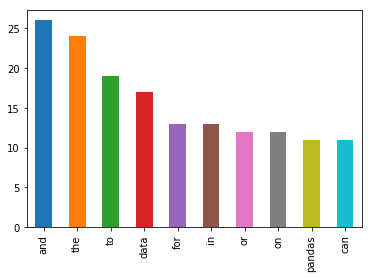

In [71]:
key, value = zip(*Counter(text.split()).most_common(10))
pd.Series(data=value, index=key).plot.bar()

## Solve Question1 using map and filter

In [121]:
def three_digit_sum_fact():
    all_combo = [(number, sum(map(lambda x: fact(int(x)), str(number)))) for number in range(100, 1000)]
    filtered_combo = filter(lambda x: x[0] == x[1], all_combo)
    return list(map(lambda x: x[0], filtered_combo))

In [122]:
three_digit_sum_fact()

[145]

In [123]:
%timeit -n 1000 -r 1 three_digit_sum_fact()

1.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
